<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01163204/blob/main/ActividalSemanal07_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nombre: Juan Carlos Torres Luna
##Matricula: A01163204
##Ciencia y analítica de datos (Gpo 10)
##11/09/22

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [2]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

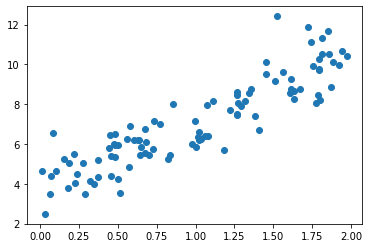

In [3]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [4]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [5]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

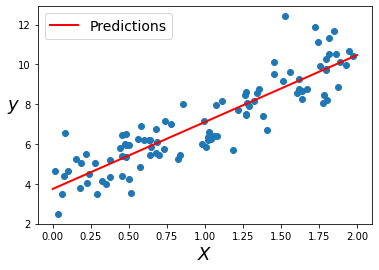

In [6]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [7]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [8]:
X_new.shape

(2, 1)

In [9]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [10]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [11]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

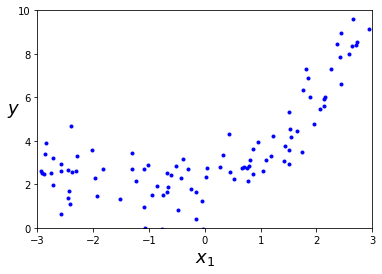

In [12]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [13]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [15]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [16]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [17]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [18]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

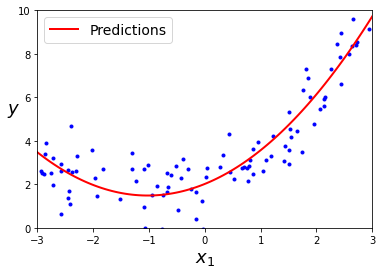

In [19]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [25]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [26]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [22]:
len(X)

1000

In [23]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

## Dividir datos de costo de manufactura

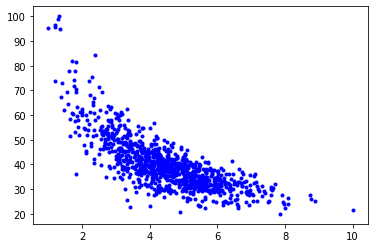

In [24]:
plt.plot(X,y,'b.')

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

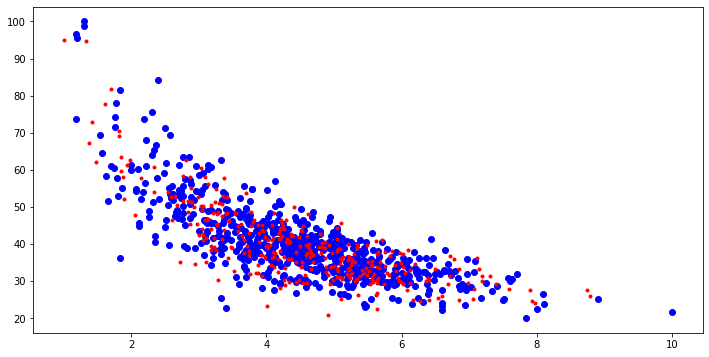

In [30]:
# Blue train
# Red test

fig, axs = plt.subplots(figsize=(12,6))
plt.plot(X_train.values, y_train, 'bo', X_test.values, y_test, 'r.')
plt.show()

## Regresion Lineal

In [32]:
#lineal
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
x_fit = np.linspace(0, X_test.values.max(), 50)
y_predict = model.predict(X_test) 

In [33]:
model.coef_[0]

-6.042079903631973

In [34]:
model.intercept_

67.16326755330024

### Ecuacion Regresion lineal
### *y = -6.164X + 67.1632*

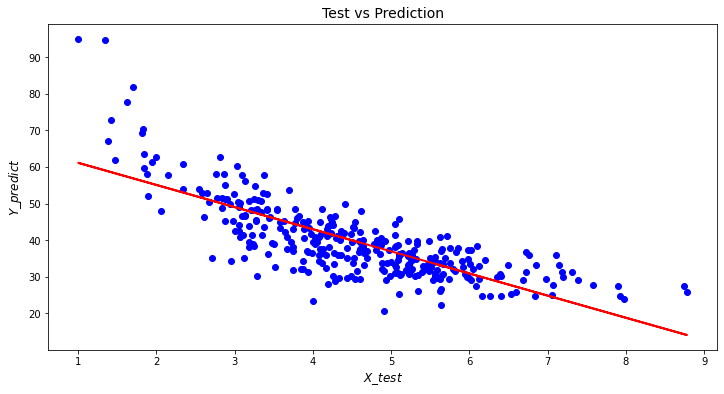

In [42]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(X_test.values,y_test,'bo')
plt.plot(X_test.values, y_predict, "r-", linewidth=2, label="Predictions")
plt.title('Test vs Prediction', fontsize=14)
plt.xlabel("$X\_test$", fontsize=12)
plt.ylabel("$Y\_predict$", fontsize=12)
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [49]:
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("mae: ", round(mae, 4))
print("rmse: ", round(rmse, 4))

mae:  4.8013
rmse:  6.6496


In [50]:
R2 = r2_score(y_test, y_predict)
print("R^2: ",round(R2, 4))

R^2:  0.6013


## Regresion Polinomial

In [ ]:
#polinomial

In [51]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_polynomial = polynomial_features.fit_transform(X.values)
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(X_polynomial, y, test_size=0.33, random_state=101)

In [52]:
model_p = LinearRegression(fit_intercept=True)
model_p.fit(x_train_p, y_train_p)

LinearRegression()

In [53]:
model_p.coef_

array([-16.20479606,   1.10592267])

In [54]:
model_p.intercept_

88.55276820181402

### Ecuacion Regresion Polinomial
### *y = 88.5527 -16.2047X + 1.1059X^2*

In [65]:
x_p=np.linspace(x_test_p[:,0].min(), x_test_p[:,0].max(), x_test_p[:,0].shape[0]).reshape(x_test_p[:,0].shape[0], 1)
X_new_poly = polynomial_features.transform(x_p)
y_new = lin_reg.predict(X_new_poly)
y_p_predict = model_p.predict(x_test_p)


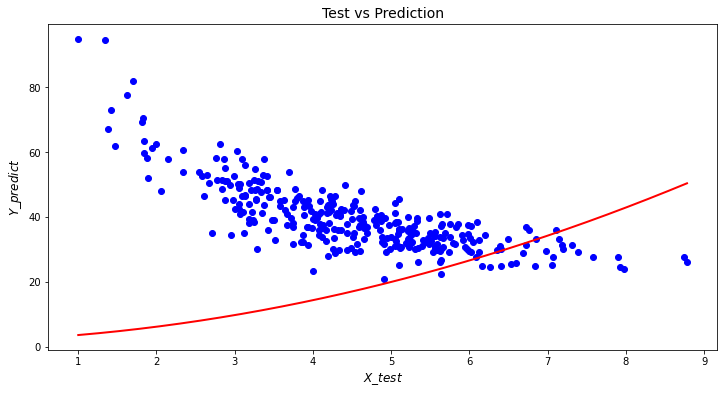

In [71]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(x_test_p[:,0],y_test_p,'bo')
plt.plot(x_p, y_new, "r-", linewidth=2, label="Predictions")
plt.title('Test vs Prediction', fontsize=14)
plt.xlabel("$X\_test$", fontsize=12)
plt.ylabel("$Y\_predict$", fontsize=12)
plt.show()

In [69]:
mae_p = mean_absolute_error(y_test_p, y_p_predict)
rmse_p = np.sqrt(mean_squared_error(y_test_p, y_p_predict))
print("mae: ", round(mae_p, 4))
print("rmse: ", round(rmse_p, 4))

mae:  4.251
rmse:  5.6869


In [70]:
R2_p = r2_score(y_test_p, y_p_predict)
print("R^2: ",round(R2_p, 4))

R^2:  0.7084


## Ridge y Lasso

In [72]:
from sklearn.linear_model import Ridge, Lasso

model_ridge = Ridge(alpha=0.3)
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.3)

In [73]:
xfit = np.linspace(0, X_test.values.max(), 50)
y_predict_rigde = model_ridge.predict(X_test)

In [74]:
model_ridge.coef_[0]

-6.040536853988173

In [75]:
model_ridge.intercept_

67.15638103467492

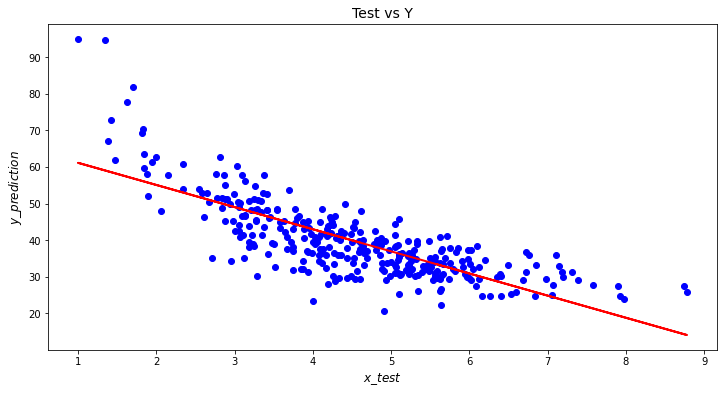

In [79]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(X_test.values,y_test,'bo')
plt.plot(X_test.values, y_predict_rigde, "r-", linewidth=2, label="Predictions")
plt.title('Test vs Y', fontsize=14)
plt.xlabel("$x\_test$", fontsize=12)
plt.ylabel("$y\_prediction$", fontsize=12)
plt.show()

In [78]:
mae_ridge = mean_absolute_error(y_test, y_predict_rigde)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_predict_rigde))
R2_ridge = r2_score(y_test, y_predict_rigde)
print('mae: ', round(mae_ridge, 4))
print('rmse:', round(rmse_ridge, 4))
print('R^2: ',round(R2_ridge, 4))

mae:  4.8012
rmse: 6.6495
R^2:  0.6013


In [80]:
model_lasso = Lasso(alpha=0.7)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.7)

In [81]:
xfit = np.linspace(0, X_test.values.max(), 250)
y_predict_lasso = model_lasso.predict(X_test)

In [82]:
model_lasso.coef_[0]

-5.642727825918782

In [83]:
model_lasso.intercept_

65.38098820002031

In [84]:
mae_lasso = mean_absolute_error(y_test, y_predict_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_predict_lasso))
R2_lasso = r2_score(y_test, y_predict_lasso)
print('mae: ', round(mae_lasso, 4))
print('rmse:', round(rmse_lasso, 4))
print('R^2: ',round(R2_lasso, 4))

mae:  4.7968
rmse: 6.669
R^2:  0.599


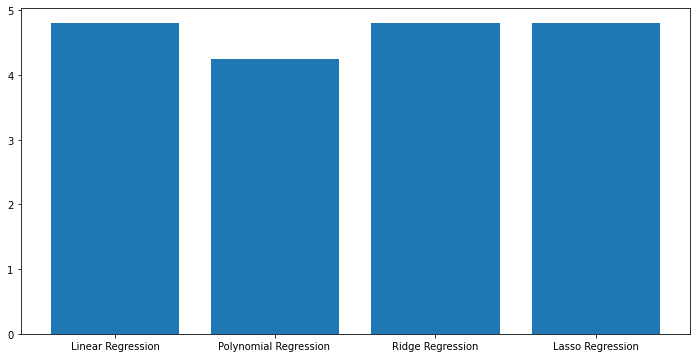

In [87]:
# Grafica
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Linear Regression', 'Polynomial Regression ', 'Ridge Regression', 'Lasso Regression']
list_values = [mae, mae_p, mae_ridge, mae_lasso]
axs.bar(list_names, list_values)
plt.show()

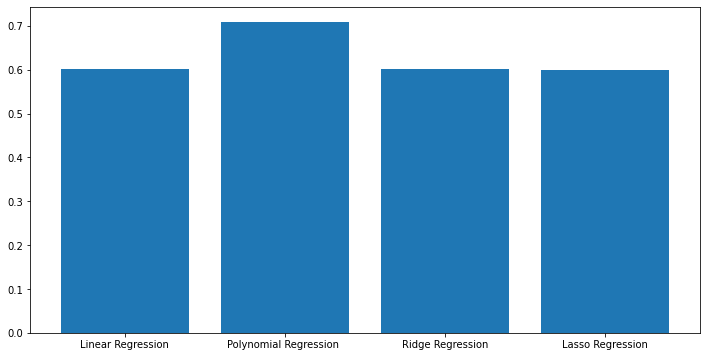

In [88]:
# Grafica R2
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Linear Regression', 'Polynomial Regression ', 'Ridge Regression', 'Lasso Regression']
list_values = [R2, R2_p, R2_ridge, R2_lasso]
axs.bar(list_names, list_values)
plt.show()

## Conclusiones
En las graficas Polynomial regression es la unica con alteraciones
 visibles. Quiere decir que los datos tienen una favor favorable 
 al momento de subir el orden al cuadrado formando una curva 
 positiva

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

In [ ]:
#tu codigo aquí